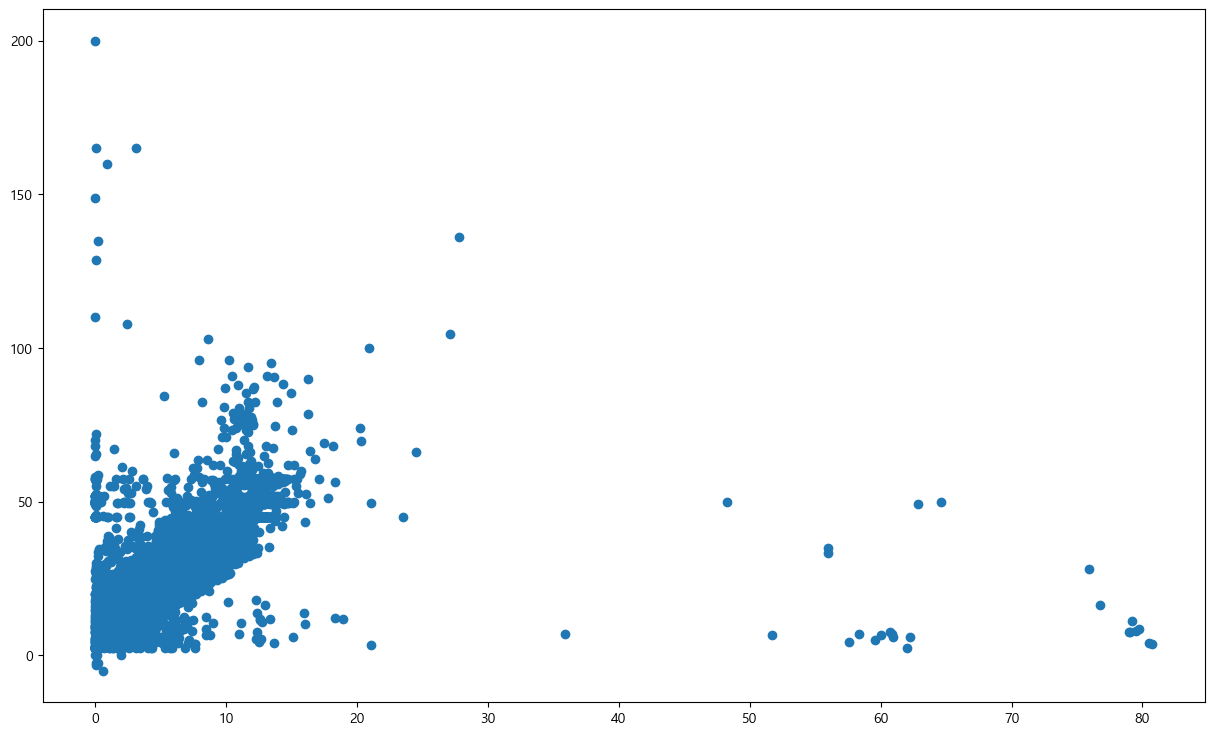

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv(r"C:\Users\302-28\git-repo\train.csv")

pickup_longitude=df['pickup_longitude']
pickup_latitude=df['pickup_latitude']
dropoff_longitude=df['dropoff_longitude']
dropoff_latitude=df['dropoff_latitude']

def outlier_index():
    i = 0
    idx_zero_distance = []    
    zipped = zip(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for x, y, _x, _y in zipped:
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이 같은 데이터의 인덱스를 idx_zero_distance에 저장 및 탑승 위도,경도 나 하차 위도,경도가 각각 0 인경우(널 아일랜드 : 아프리카 해역 위치) 잘못된 값이므로 제외외
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)
        elif (x == 0) and (y == 0):
            idx_zero_distance.append(i)
        elif (_x == 0) and (_y == 0):
            idx_zero_distance.append(i)    
        i+=1        
            
    total_indexremove = list((idx_zero_distance))
    
    return total_indexremove

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx, axis=0)

remove_index = outlier_index()
df = remove_outlier(df,remove_index)
df_fare_amount=df['fare_amount']

def haversine(lat1, lon1, lat2, lon2):
    # 위도, 경도를 라디안으로 변환
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine 공식을 사용하여 거리 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    # 지구의 반지름 (단위: 마일)
    R = 3958.8  # 마일 단위
    
    # 거리 계산 (단위: 마일)
    distance = R * c
    return distance

df['distance'] = df.apply(lambda df: haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude']), axis=1)
 # 마일거리 100 미만으로 조정
df = df[df['distance'] < 100]
plt.rc('figure',figsize=(15,9))
plt.rc('font',family='Malgun Gothic')
plt.scatter(df['distance'],df['fare_amount'])
plt.show()

기울기 : [2.61294372]
피어슨 상관 계수 : 0.72980
y 절편 : [5.80948202]
예측값 : [[ 7.4830572 ]
 [19.52933911]
 [ 8.06555138]
 ...
 [ 7.22967821]
 [ 9.48421229]
 [ 6.88959115]]


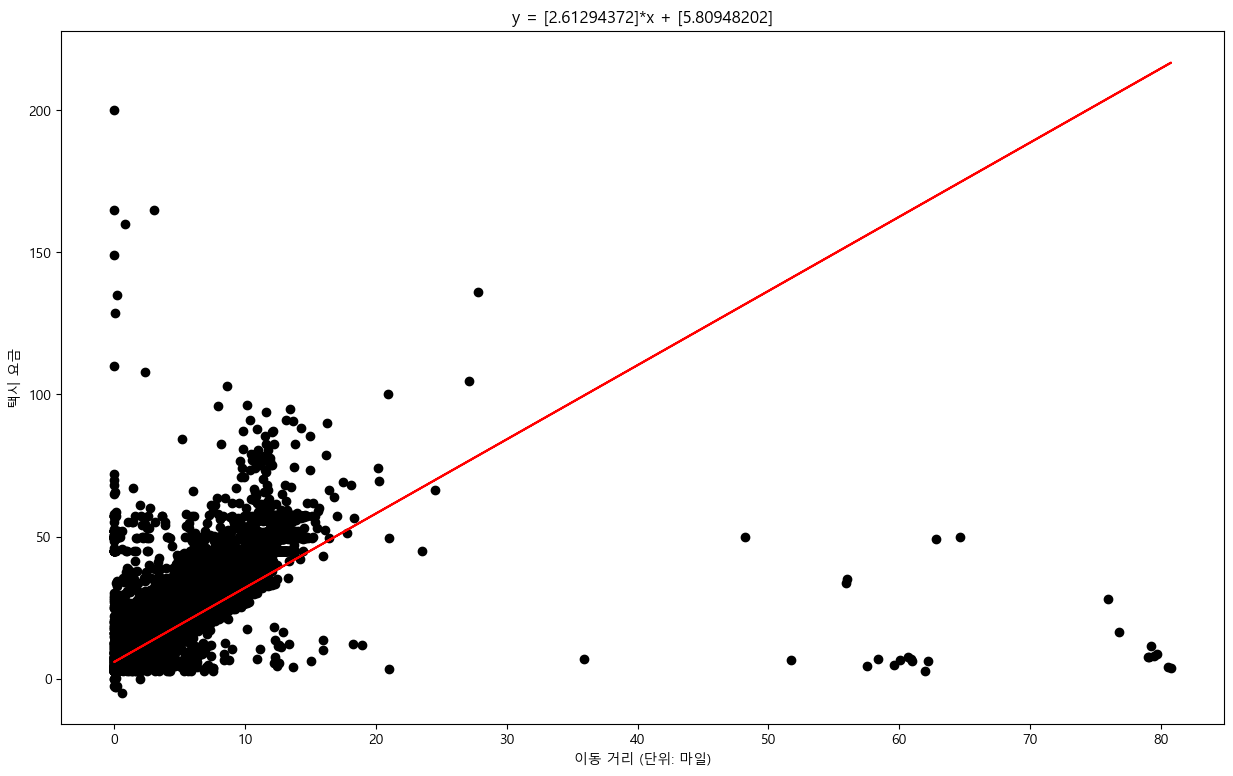

In [95]:
X = df.distance.values
Y = df.fare_amount.values

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, Y)
# 기울기
print(f'기울기 : {lr.coef_[0]}')
# 피어슨 상관 계수
pearson_corr = np.corrcoef(X.flatten(), Y.flatten())[0, 1]
print(f'피어슨 상관 계수 : {pearson_corr:.5f}')
# y 절편
print(f'y 절편 : {lr.intercept_}')
NewY = lr.coef_[0]*X +lr.intercept_
# 예측값 NewY
print(f'예측값 : {NewY}')

plt.scatter(X,Y,color='black')
plt.xlabel('이동 거리 (단위: 마일)')
plt.ylabel('택시 요금')
plt.plot(X, NewY, color='red')
plt.title(f'y = {lr.coef_[0]}*x + {lr.intercept_}')
plt.show()

In [96]:
import statsmodels.api as sm
pd.set_option('display.notebook_repr_html', False)

res = sm.OLS(Y, sm.add_constant(X)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 5.521e+04
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:40:41   Log-Likelihood:            -1.5969e+05
No. Observations:               48456   AIC:                         3.194e+05
Df Residuals:                   48454   BIC:                         3.194e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8095      0.038    153.175      0.000       5.735       5.884
x1             2.6129      0.011    234.978      0.000       2.591       2.635
==============================================================================
Omnibus:                    57213.370   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        187898566.549
Skew:                          -5.107   Prob(JB):                         0.00
Kurtosis:                     307.895   Cond. No.                         4.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""